# Data Exploration, week 08 project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime

plt.rcParams['figure.figsize'] = (10,6)

In [2]:
#monday = pd.read_csv('data/monday.csv', delimiter=';')
#tuesday = pd.read_csv('data/tuesday.csv', delimiter=';')
#wednesday = pd.read_csv('data/wednesday.csv', delimiter=';')
#thursday = pd.read_csv('data/thursday.csv', delimiter=';')
#friday = pd.read_csv('data/friday.csv', delimiter=';')
df = pd.read_csv('data/wednesday.csv', delimiter=';')

In [3]:
df.head()

,timestamp,customer_no,location
0,2019-09-04 07:00:00,1,fruit
1,2019-09-04 07:00:00,2,dairy
2,2019-09-04 07:00:00,3,fruit
3,2019-09-04 07:00:00,4,fruit
4,2019-09-04 07:00:00,5,dairy


In [4]:
df.shape

(5050, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    5050 non-null   object
 1   customer_no  5050 non-null   int64 
 2   location     5050 non-null   object
dtypes: int64(1), object(2)
memory usage: 118.5+ KB


In [6]:
def ts_to_datetime_index(df):
    df.copy()
    
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    
    return df

In [7]:
df2 = ts_to_datetime_index(df)

In [8]:
def add_prev_loc_and_time_spent_columns(df):
    '''
    Adds a column to a single-day supermarket dataset dataframe stating if the previous location of the row
    to show where the respective customer is coming from.
    
    Parameters:
    ----------
    DataFrame (Single-day; does not work with a combine dataset for the whole week!)
    '''
    
    df = df.copy()
    
    customer_prev_loc = {}
    previous_location = []
    time_spent = []
    for row in df.index:
        cust_no = df.loc[row]['customer_no']
        new_location = df.loc[row]['location']
        time_entered = df.loc[row]['timestamp']
        
        if cust_no not in customer_prev_loc:
            customer_prev_loc[cust_no] = [new_location, time_entered]
            previous_location.append('first')
            time_spent.append(0)
        else:
            old_location = customer_prev_loc[cust_no][0]
            old_time_entered = customer_prev_loc[cust_no][1]
            
            time_delta = time_entered - old_time_entered
            minutes_spent_at_previous = int(time_delta.total_seconds() / 60) % 60
            
            previous_location.append(old_location)
            time_spent.append(minutes_spent_at_previous)
            customer_prev_loc[cust_no] = [new_location, time_entered]
    
    df['previous_location'] = previous_location
    df['min_spent_at_previous'] = time_spent
    
    return df

In [9]:
df2 = add_prev_loc_and_time_spent_columns(df2)
df2

,timestamp,customer_no,location,previous_location,min_spent_at_previous
0,2019-09-04 07:00:00,1,fruit,first,0
1,2019-09-04 07:00:00,2,dairy,first,0
2,2019-09-04 07:00:00,3,fruit,first,0
3,2019-09-04 07:00:00,4,fruit,first,0
4,2019-09-04 07:00:00,5,dairy,first,0
...,...,...,...,...,...
5045,2019-09-04 21:48:00,1528,spices,drinks,3
5046,2019-09-04 21:49:00,1520,dairy,spices,1
5047,2019-09-04 21:49:00,1529,dairy,fruit,2
5048,2019-09-04 21:49:00,1530,fruit,spices,2


#### Calculate the total number of customers in each section

In [10]:
df2['location'].value_counts()

checkout    1526
fruit       1043
dairy        976
drinks       775
spices       730
Name: location, dtype: int64

In [11]:
df2['customer_no'].unique()[-1:]

array([1531], dtype=int64)

==> 5 customers are not accounted for at checkout

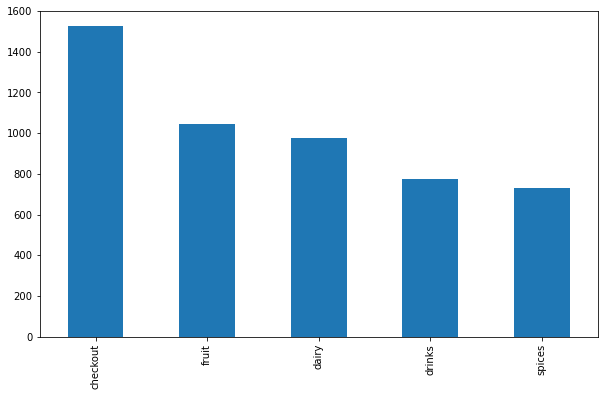

In [12]:
df['location'].value_counts().plot.bar()

#### Display the number of customers at checkout over time

In [13]:
df[df['location'] == 'checkout'].groupby(['timestamp'])['customer_no'].count()

timestamp
2019-09-04 07:01:00    1
2019-09-04 07:02:00    2
2019-09-04 07:03:00    1
2019-09-04 07:04:00    1
2019-09-04 07:05:00    1
                      ..
2019-09-04 21:45:00    3
2019-09-04 21:46:00    1
2019-09-04 21:47:00    1
2019-09-04 21:48:00    1
2019-09-04 21:49:00    1
Name: customer_no, Length: 699, dtype: int64

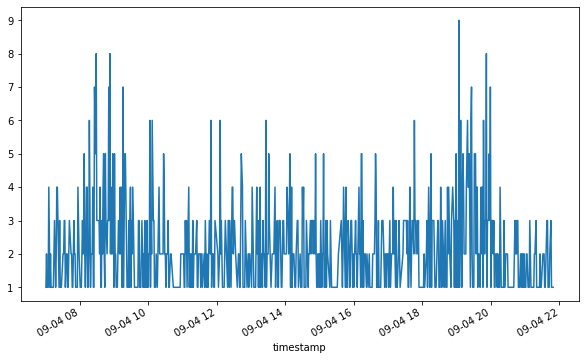

In [14]:
df[df['location'] == 'checkout'].groupby(['timestamp'])['customer_no'].count().plot()

#### Calculate the time each customer spent in the market

In [15]:
df2.groupby('customer_no')['min_spent_at_previous'].sum()

customer_no
1        2
2        6
3       11
4        3
5        1
        ..
1527     3
1528     3
1529     4
1530     3
1531     3
Name: min_spent_at_previous, Length: 1531, dtype: int64

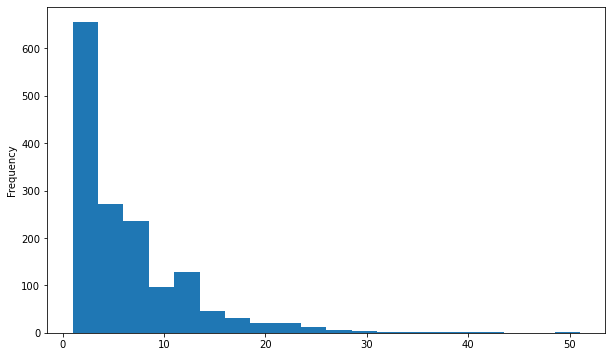

In [16]:
df2.groupby('customer_no')['min_spent_at_previous'].sum().plot.hist(bins=20)

#### Calculate the total number of customers in the supermarket over time.

In [17]:
def add_in_store_count_col(df):
    df = df.copy()
    
    customers_in_store = []
    count = 0
    for row in df.index:
        if df.loc[row]['previous_location'] == 'first':
            count += 1
        if df.loc[row]['location'] == 'checkout':
            count -= 1
        customers_in_store.append(count)
        
    df['customers_in_store'] = customers_in_store
    
    return df

In [18]:
df2 = add_in_store_count_col(df2)
df2

,timestamp,customer_no,location,previous_location,min_spent_at_previous,customers_in_store
0,2019-09-04 07:00:00,1,fruit,first,0,1
1,2019-09-04 07:00:00,2,dairy,first,0,2
2,2019-09-04 07:00:00,3,fruit,first,0,3
3,2019-09-04 07:00:00,4,fruit,first,0,4
4,2019-09-04 07:00:00,5,dairy,first,0,5
...,...,...,...,...,...,...
5045,2019-09-04 21:48:00,1528,spices,drinks,3,6
5046,2019-09-04 21:49:00,1520,dairy,spices,1,6
5047,2019-09-04 21:49:00,1529,dairy,fruit,2,6
5048,2019-09-04 21:49:00,1530,fruit,spices,2,6


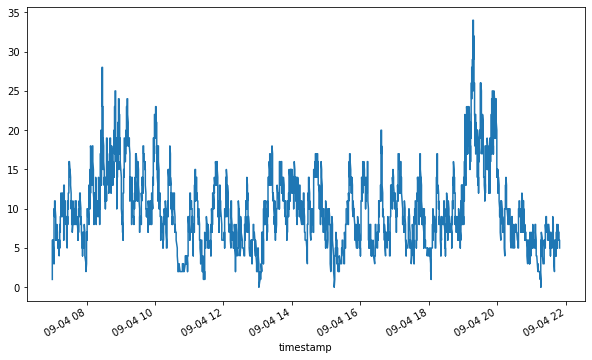

In [19]:
df2.set_index('timestamp')['customers_in_store'].plot()

#### Calculate the total number of customers in each section over time

In [20]:
def add_customer_in_locations_cols(df):    
    '''
    This function adds columns for each location (except checkout) 
    with the count of customers currently in them at each row.
    '''
    
    
    df = df.copy()
    
    customers_in_fruit = []
    customers_in_dairy = []
    customers_in_drinks = []
    customers_in_spices = []
    customers_in_checkout = []

    fruit_count = 0
    dairy_count = 0
    drinks_count = 0
    spices_count = 0



    for row in df.index:
        if df.loc[row]['location'] == 'fruit':
            fruit_count += 1
        if df.loc[row]['location'] == 'dairy':
            dairy_count  += 1
        if df.loc[row]['location'] == 'drinks':
            drinks_count  += 1
        if df.loc[row]['location'] == 'spices':
            spices_count  += 1

        if df.loc[row]['previous_location'] == 'fruit':
            fruit_count  -= 1
        if df.loc[row]['previous_location'] == 'dairy':
            dairy_count  -= 1
        if df.loc[row]['previous_location'] == 'drinks':
            drinks_count  -= 1
        if df.loc[row]['previous_location'] == 'spices':
            spices_count  -= 1


        customers_in_fruit.append(fruit_count)
        customers_in_dairy.append(dairy_count)
        customers_in_drinks.append(drinks_count)
        customers_in_spices.append(spices_count)

    df['customers_in_fruit'] = customers_in_fruit
    df['customers_in_dairy'] = customers_in_dairy
    df['customers_in_drinks'] = customers_in_drinks
    df['customers_in_spices'] = customers_in_spices

    return df

In [21]:
df3 = add_customer_in_locations_cols(df2)
df3

,timestamp,customer_no,location,previous_location,min_spent_at_previous,customers_in_store,customers_in_fruit,customers_in_dairy,customers_in_drinks,customers_in_spices
0,2019-09-04 07:00:00,1,fruit,first,0,1,1,0,0,0
1,2019-09-04 07:00:00,2,dairy,first,0,2,1,1,0,0
2,2019-09-04 07:00:00,3,fruit,first,0,3,2,1,0,0
3,2019-09-04 07:00:00,4,fruit,first,0,4,3,1,0,0
4,2019-09-04 07:00:00,5,dairy,first,0,5,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...
5045,2019-09-04 21:48:00,1528,spices,drinks,3,6,2,0,1,3
5046,2019-09-04 21:49:00,1520,dairy,spices,1,6,2,1,1,2
5047,2019-09-04 21:49:00,1529,dairy,fruit,2,6,1,2,1,2
5048,2019-09-04 21:49:00,1530,fruit,spices,2,6,2,2,1,1


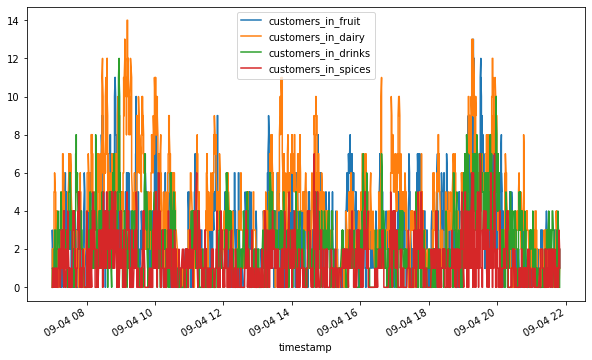

In [22]:
df3.set_index('timestamp')[['customers_in_fruit', 'customers_in_dairy', 'customers_in_drinks', 'customers_in_spices']].plot()

#### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [23]:
def barplot_comparing_first_followed(df):
    first = df[df['previous_location'] == 'first']['location'].value_counts()
    following = df[df['previous_location'] != 'first']['location'].value_counts()
    pd.DataFrame(following).join(pd.DataFrame(first), lsuffix='_following', rsuffix='_first').drop('checkout').plot.bar()

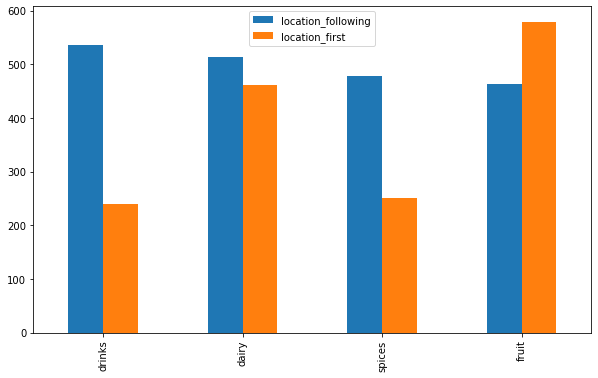

In [24]:
barplot_comparing_first_followed(df2)